# 3b. Fitting carbonate and SO$_2$ peaks
- This notebook shows how to fit secondary peaks, such as carbonate and S-rich phases in vapour bubbles and fluid inclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from tqdm import tqdm
pf.__version__

'1.0.1'

In [2]:
# Here, we are loading in the settings files from Step1. If all you want to do is find secondary phases, paste that code here
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

In [3]:
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'diad','Spec', 'CRR', 'secphase','Series','unquant']
Diad_Files=pf.get_files(path=spectra_path, file_ext=spectra_file_ext, exclude_str=exclude_str)
print(Diad_Files)
File_df=pd.DataFrame(data={'filename': Diad_Files})

['04 FG04-A1-4-start.txt', '05 187-9-203a-MIA-49mw.txt', '06 187-9-203a-MIA.txt', '09 187-9-203a-MIC.txt', '10 crystalbond.txt', '11 187-9-203a-MIC_demixed.txt', '14 187-9-203b-MIA-49mw.txt', '15 187-9-203b-MIA-rep1.txt', '16 187-9-203b-MIA-rep2.txt', '17 187-9-203b-MIA-rep3.txt', '21 187-9-203b-FIA.txt', '22 187-9-204-MIA-49mw.txt', '24 187-9-204-MIA-rep1.txt', '25 187-9-204-MIA-rep2.txt', '26 187-9-204-MIA-rep3.txt', '29 187-9-204-FIB.txt', '30 187-9-204-FIC.txt', '31 187-9-204-FIE.txt', '32 187-9-204-FID.txt', '33 187-9-204-MIB.txt', '34 187-9-205-MIA-rep1.txt', '35 187-9-205-MIA-rep2.txt', '36 187-9-205-MIA-rep3.txt', '37 187-9-205-MIA-20mw.txt', '39 187-9-206-MIA-rep1.txt', '40 187-9-206-MIA-rep2.txt', '41 187-9-206-MIA-rep3.txt', '42 187-9-207-MIA-rep1.txt', '43 187-9-207-MIA-rep2.txt', '44 187-9-207-MIA-rep3.txt', '45 187-9-207-MIB-rep1.txt', '46 187-9-207-MIB-rep2.txt', '47 187-9-207-MIB-rep3.txt', '49 187-9-208-MIA-rep1.txt', '50 187-9-208-MIA-rep2.txt', '51 187-9-208-MIA-rep3

## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


## Example 1 - Using Scipy find peaks to look for SO2

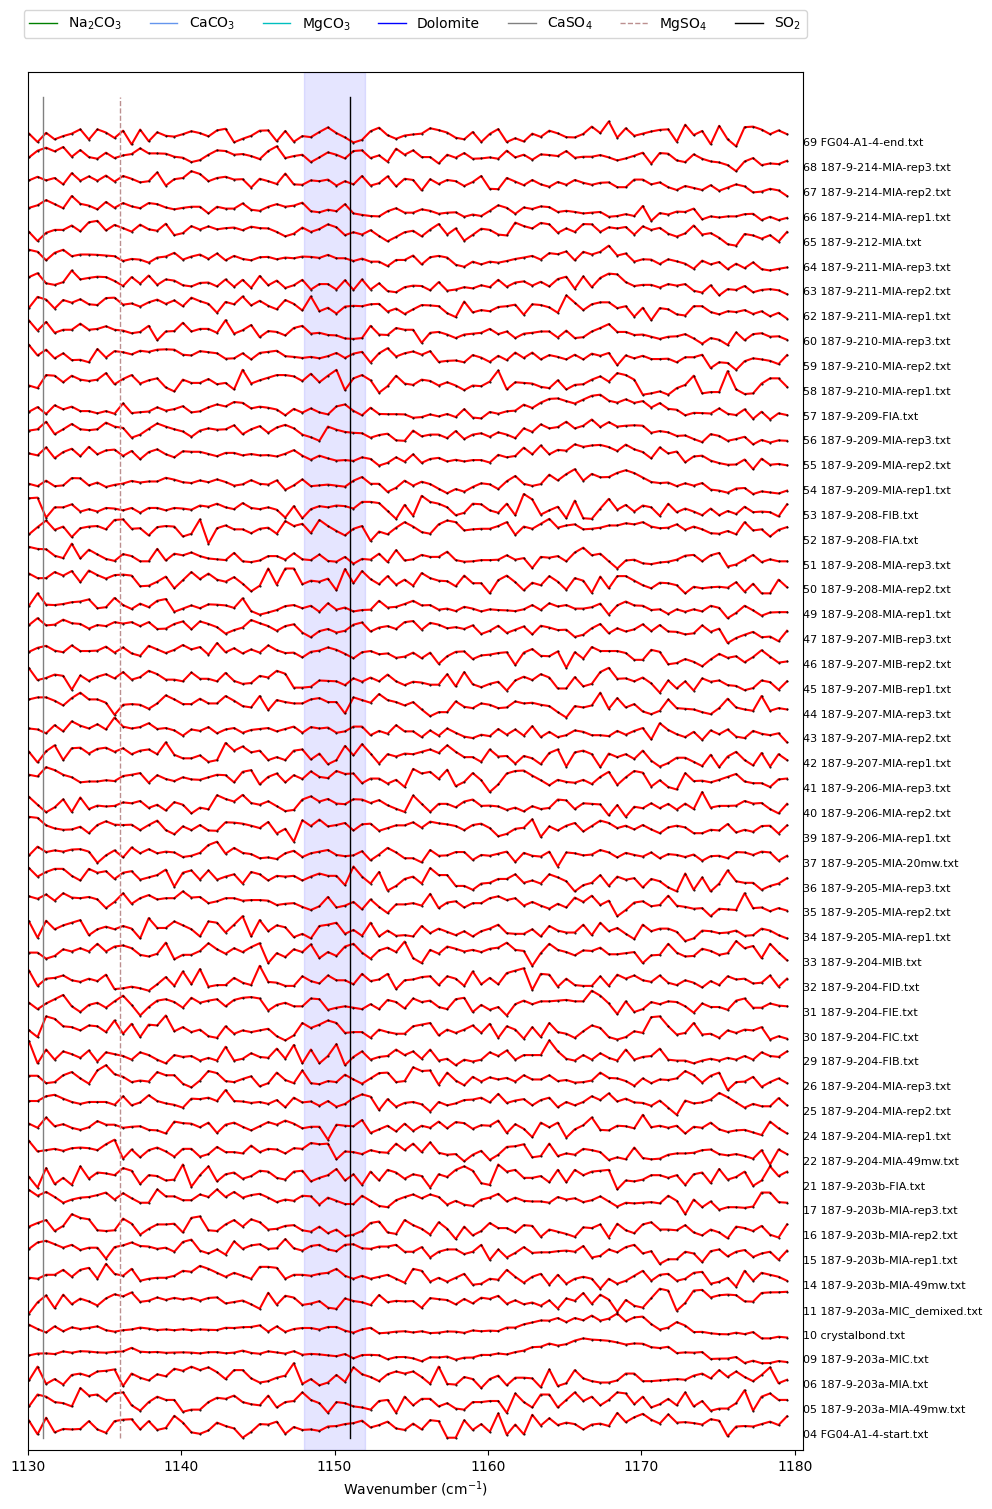

In [4]:
prominence_SO2=20
height_SO2=20
width_SO2=2
threshold_SO2=1

SO2_peaks_scipy, x_data_scipy, y_data_scipy, fig_scipy=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
filetype=spectra_filetype, find_peaks_filter=True,  
xlim_peaks=[1148, 1152], xlim_plot=[1130, 1180], yscale=0.3,
prominence=prominence_SO2, height=height_SO2, width=width_SO2, threshold=threshold_SO2)

SO2_peaks=SO2_peaks_scipy

In [5]:
SO2_peaks

pos  height  prom                     file_names
0   NaN     NaN   NaN         04 FG04-A1-4-start.txt
1   NaN     NaN   NaN     05 187-9-203a-MIA-49mw.txt
2   NaN     NaN   NaN          06 187-9-203a-MIA.txt
3   NaN     NaN   NaN          09 187-9-203a-MIC.txt
4   NaN     NaN   NaN             10 crystalbond.txt
5   NaN     NaN   NaN  11 187-9-203a-MIC_demixed.txt
6   NaN     NaN   NaN     14 187-9-203b-MIA-49mw.txt
7   NaN     NaN   NaN     15 187-9-203b-MIA-rep1.txt
8   NaN     NaN   NaN     16 187-9-203b-MIA-rep2.txt
9   NaN     NaN   NaN     17 187-9-203b-MIA-rep3.txt
10  NaN     NaN   NaN          21 187-9-203b-FIA.txt
11  NaN     NaN   NaN      22 187-9-204-MIA-49mw.txt
12  NaN     NaN   NaN      24 187-9-204-MIA-rep1.txt
13  NaN     NaN   NaN      25 187-9-204-MIA-rep2.txt
14  NaN     NaN   NaN      26 187-9-204-MIA-rep3.txt
15  NaN     NaN   NaN           29 187-9-204-FIB.txt
16  NaN     NaN   NaN           30 187-9-204-FIC.txt
17  NaN     NaN   NaN           31 187-9-204-FIE.txt
18  NaN     NaN   NaN           32 187-9-204-FID.txt
19  NaN     NaN   NaN           33 187-9-204-MIB.txt
20  NaN     NaN   NaN      34 187-9-205-MIA-rep1.txt
21  NaN     NaN   NaN      35 187-9-205-MIA-rep2.txt
22  NaN     NaN   NaN      36 187-9-205-MIA-rep3.txt
23  NaN     NaN   NaN      37 187-9-205-MIA-20mw.txt
24  NaN     NaN   NaN      39 187-9-206-MIA-rep1.txt
25  NaN     NaN   NaN      40 187-9-206-MIA-rep2.txt
26  NaN     NaN   NaN      41 187-9-206-MIA-rep3.txt
27  NaN     NaN   NaN      42 187-9-207-MIA-rep1.txt
28  NaN     NaN   NaN      43 187-9-207-MIA-rep2.txt
29  NaN     NaN   NaN      44 187-9-207-MIA-rep3.txt
30  NaN     NaN   NaN      45 187-9-207-MIB-rep1.txt
31  NaN     NaN   NaN      46 187-9-207-MIB-rep2.txt
32  NaN     NaN   NaN      47 187-9-207-MIB-rep3.txt
33  NaN     NaN   NaN      49 187-9-208-MIA-rep1.txt
34  NaN     NaN   NaN      50 187-9-208-MIA-rep2.txt
35  NaN     NaN   NaN      51 187-9-208-MIA-rep3.txt
36  NaN     NaN   NaN           52 187-9-208-FIA.txt
37  NaN     NaN   NaN           53 187-9-208-FIB.txt
38  NaN     NaN   NaN      54 187-9-209-MIA-rep1.txt
39  NaN     NaN   NaN      55 187-9-209-MIA-rep2.txt
40  NaN     NaN   NaN      56 187-9-209-MIA-rep3.txt
41  NaN     NaN   NaN           57 187-9-209-FIA.txt
42  NaN     NaN   NaN      58 187-9-210-MIA-rep1.txt
43  NaN     NaN   NaN      59 187-9-210-MIA-rep2.txt
44  NaN     NaN   NaN      60 187-9-210-MIA-rep3.txt
45  NaN     NaN   NaN      62 187-9-211-MIA-rep1.txt
46  NaN     NaN   NaN      63 187-9-211-MIA-rep2.txt
47  NaN     NaN   NaN      64 187-9-211-MIA-rep3.txt
48  NaN     NaN   NaN           65 187-9-212-MIA.txt
49  NaN     NaN   NaN      66 187-9-214-MIA-rep1.txt
50  NaN     NaN   NaN      67 187-9-214-MIA-rep2.txt
51  NaN     NaN   NaN      68 187-9-214-MIA-rep3.txt
52  NaN     NaN   NaN           69 FG04-A1-4-end.txt

### Now filter out ones with no peaks, or low prominence before we loop through them

In [6]:
# Remove the ones where it didnt find SO2
SO2_notNa=np.isnan(SO2_peaks['pos'])
# Remove ones with a prominence less than this. 
prom_filt=35
SO2_filter=((SO2_peaks['prom']>prom_filt))&(~SO2_notNa)
print('Number kept with this filter:')
print(sum(SO2_filter))
print('Number discarded:')
print(sum(~SO2_filter&(~SO2_notNa)))
filenames_SO2=list(File_df['filename'].loc[SO2_filter])
print('filenames with SO2:')
print(filenames_SO2)

Number kept with this filter:
0
Number discarded:
0
filenames with SO2:
[]


### Choose a filename to test peak fits

In [7]:
if sum(SO2_filter)>0:
    filename=filenames_SO2[0]

### Set up configuration file for S peak fitting
- Here, we are using a spline to quantify the area down to the 92% of the peak height (int_cut_of=0.08), there are differen options you can use for this

In [8]:
if sum(SO2_filter)>0:
    SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
    upper_bck=[1190, 1200], cent=1150, x_range_bck=20, N_peaks=1,   model_name='Spline', int_cut_off=0.05)
    print(SO2_peak_config)

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
    path=spectra_path, filename=filename, filetype=spectra_filetype, 
     plot_figure=True)

## Now lets loop through files

In [9]:
files_to_fit=filenames_SO2
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_SO2 = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)

0it [00:00, ?it/s]


In [10]:
df_Merge_SO2

Empty DataFrame
Columns: []
Index: []

### Plot peak areas and peak heights

In [11]:
if sum(SO2_filter)>0:
    plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
            df_Merge_SO2['Peak_Height_SO2'], 'ok')
    plt.xlabel('Peak Area SO2')
    plt.ylabel('Peak Height SO2')
    # plt.yscale('log')
# plt.xscale('log')

### Save this to excel

In [12]:
if sum(SO2_filter)>0:
    df_Merge_SO2['filename'] = df_Merge_SO2['filename'].str.replace('--Spec.Data 1', '')
    df_Merge_SO2.to_excel('SO2_Peak_fits.xlsx', index=False)

## Now do the same to ID any carbonate peaks

### Using scipy find peaks methods
- This method doesnt always work perfectly for broader carbonate peaks

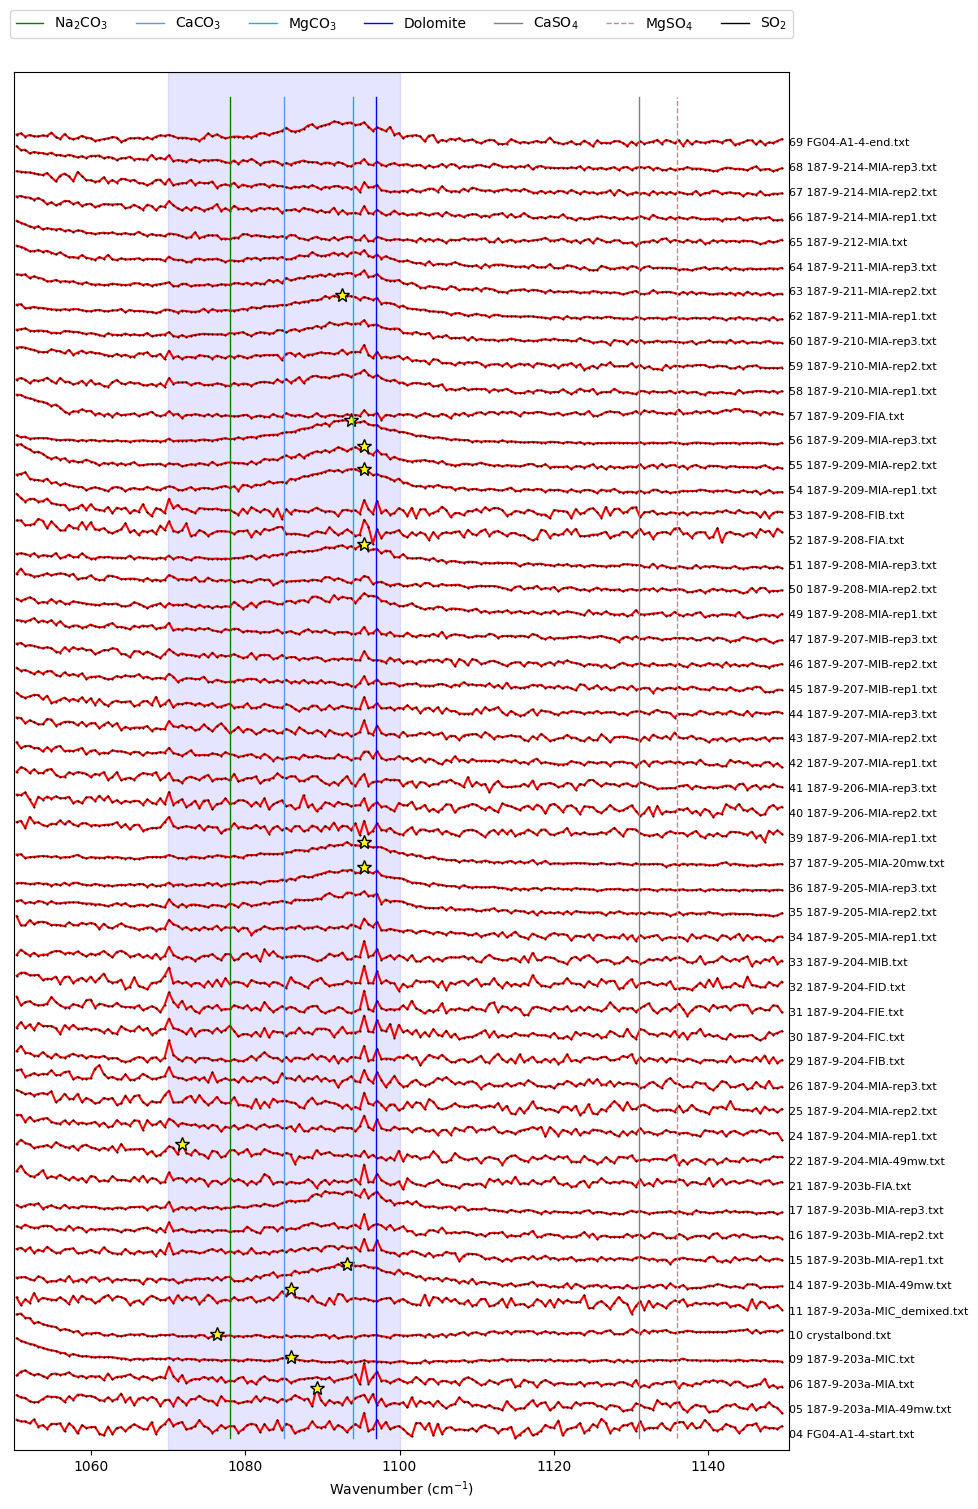

In [13]:

prominence_carb=20
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_scipy, x_data_scipy, y_data_scipy, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, find_peaks_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)
Carb_peaks=Carb_peaks_scipy

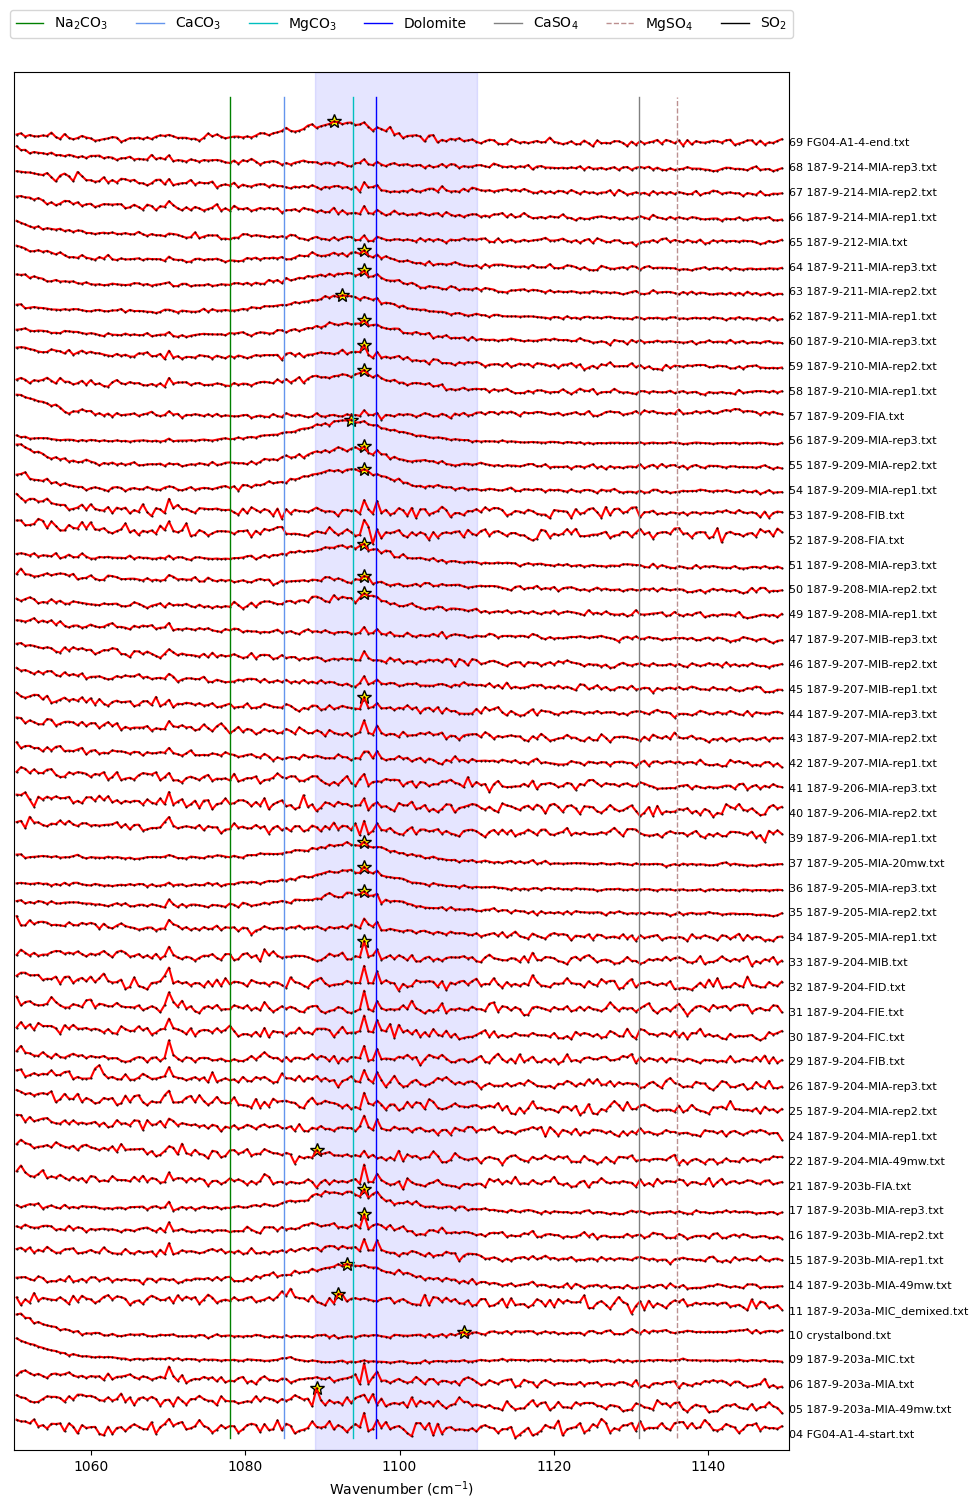

In [25]:

prominence_carb=15
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_prom, x_data_prom, y_data_prom, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, prominence_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1089, 1110], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)
Carb_peaks=Carb_peaks_prom

## Find ones with certain peak parameters to include

In [31]:
Carb_noNa=np.isnan(Carb_peaks['pos'])
prom_filter=10
Carb_filter=((Carb_peaks['prom']>prom_filter))&(~Carb_noNa)&(~Carb_peaks['file_names'].str.contains("crystalbond|203a-MIA-49mw|demix|204-MIA-49|207-MIA-rep3|204-MIB"))
print('Number kept with this filter:')
print(sum(Carb_filter))
print('Number discarded:')
print(sum(~Carb_filter&(~Carb_noNa)))
filenames_Carb=list(File_df['filename'].loc[Carb_filter])
print('filenames with carb:')
print(filenames_Carb)

Number kept with this filter:
19
Number discarded:
6
filenames with carb:
['14 187-9-203b-MIA-49mw.txt', '16 187-9-203b-MIA-rep2.txt', '17 187-9-203b-MIA-rep3.txt', '35 187-9-205-MIA-rep2.txt', '36 187-9-205-MIA-rep3.txt', '37 187-9-205-MIA-20mw.txt', '49 187-9-208-MIA-rep1.txt', '50 187-9-208-MIA-rep2.txt', '51 187-9-208-MIA-rep3.txt', '54 187-9-209-MIA-rep1.txt', '55 187-9-209-MIA-rep2.txt', '56 187-9-209-MIA-rep3.txt', '58 187-9-210-MIA-rep1.txt', '59 187-9-210-MIA-rep2.txt', '60 187-9-210-MIA-rep3.txt', '62 187-9-211-MIA-rep1.txt', '63 187-9-211-MIA-rep2.txt', '64 187-9-211-MIA-rep3.txt', '69 FG04-A1-4-end.txt']


### Fit one to tweak parameters

generic_peak_config(name='Carb', lower_bck=[1060, 1070], upper_bck=[1120, 1150], model_name='Spline', x_range_bck=50, N_poly_carb_bck=2, amplitude=1000, cent=1090, outlier_sigma=12, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, return_other_params=False, N_peaks=1, int_cut_off=0.05)


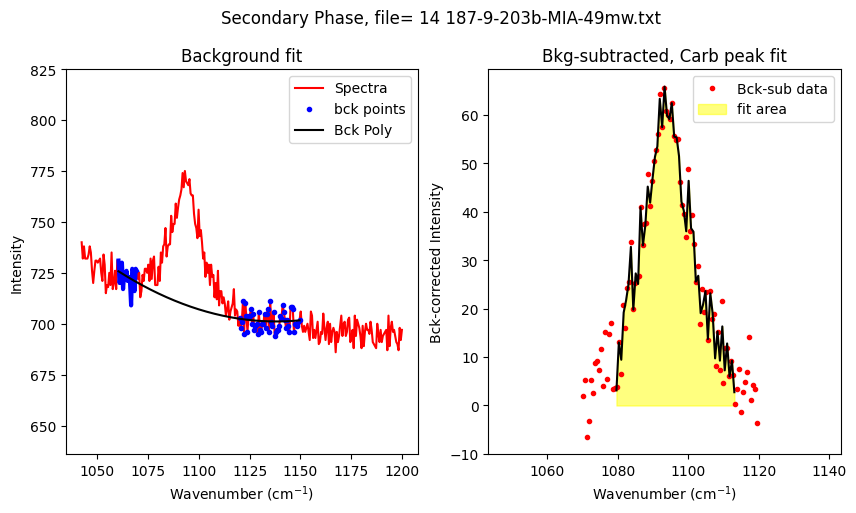

In [32]:
if sum(Carb_filter)>0:
    filename_carb=filenames_Carb[0]

    Carb_peak_config=pf.generic_peak_config(name='Carb', lower_bck=[1060, 1070],
    upper_bck=[1120, 1150], cent=1090, x_range_bck=50, N_poly_carb_bck=2, model_name='Spline')
    print(Carb_peak_config)

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
    path=spectra_path, filename=filename_carb, filetype=spectra_filetype,
     plot_figure=True)

### Loop over all carbonate files

100%|██████████| 19/19 [00:08<00:00,  2.14it/s]


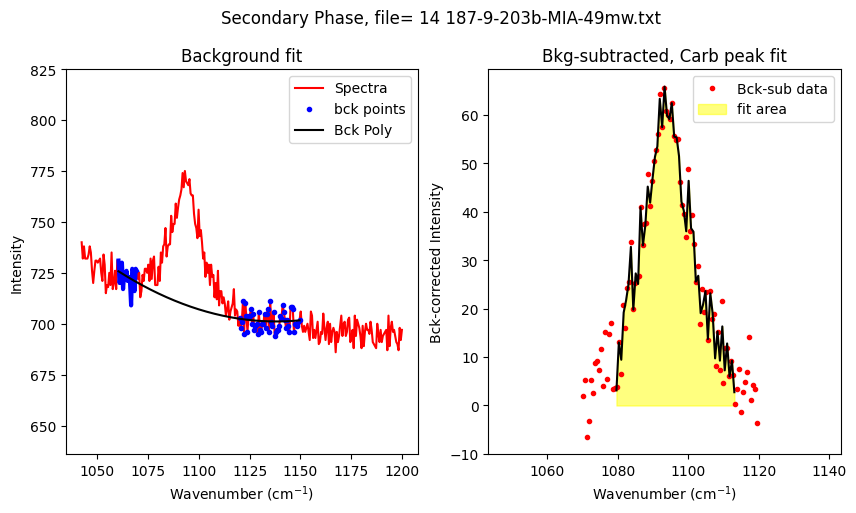

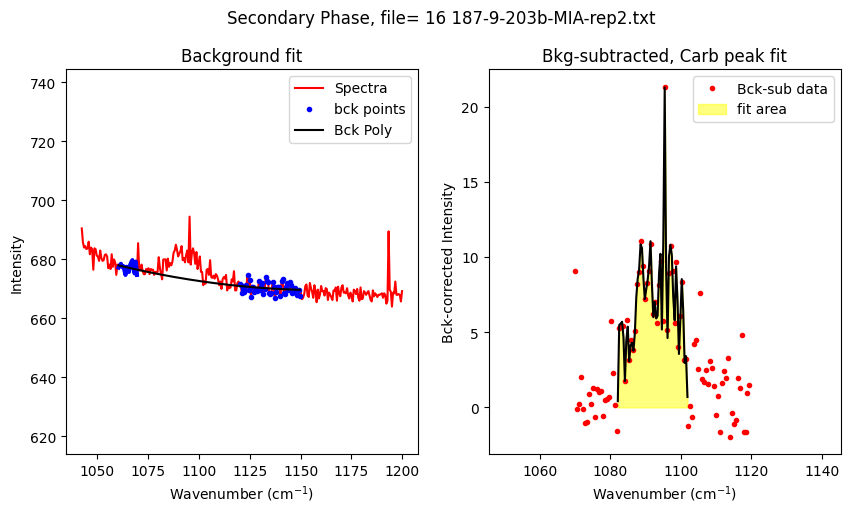

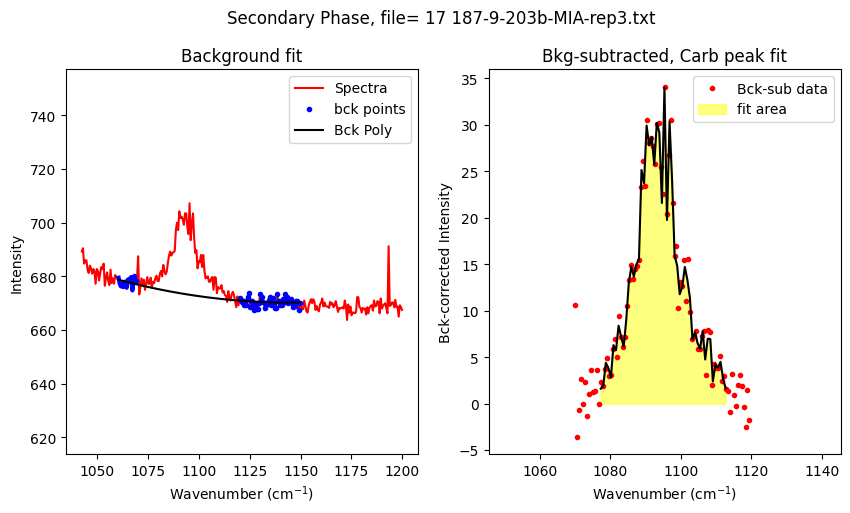

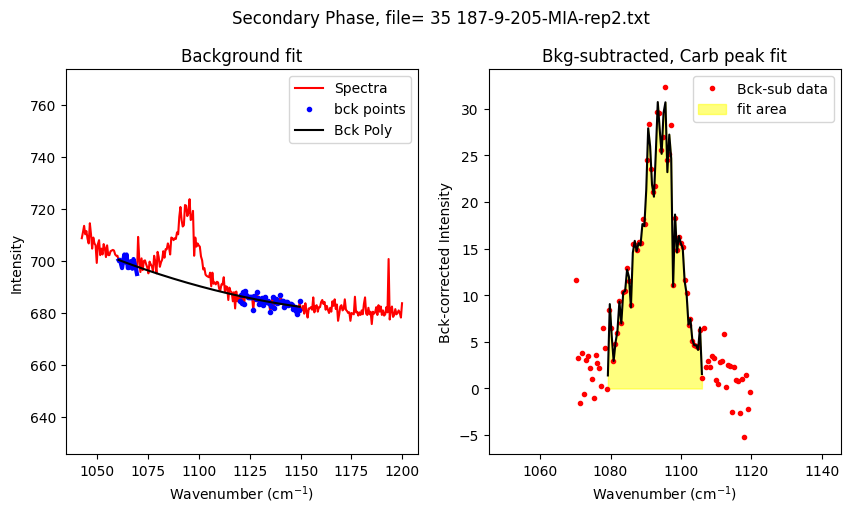

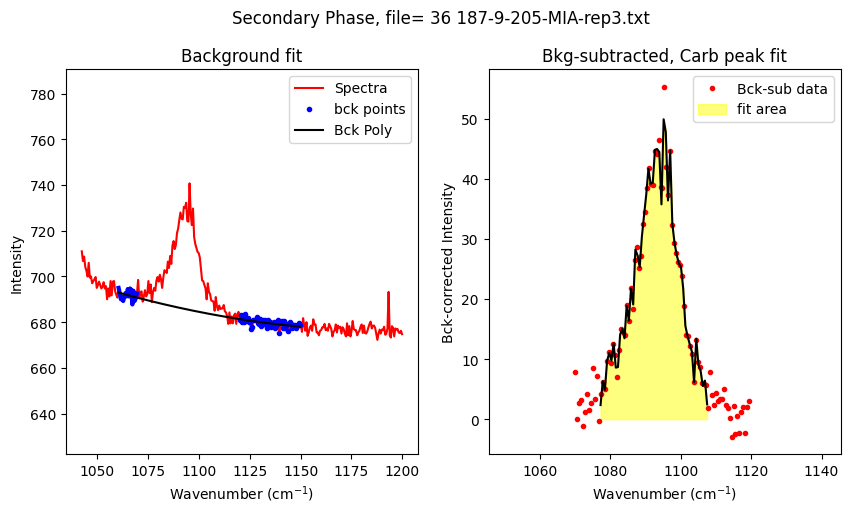

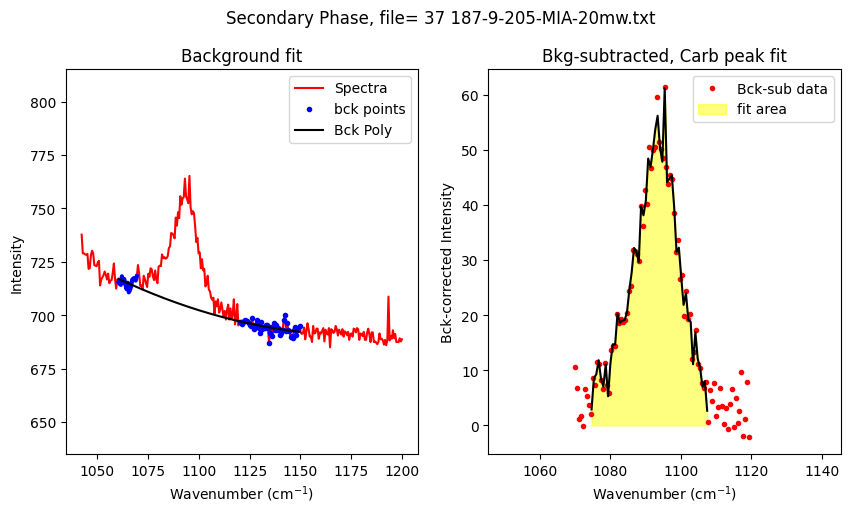

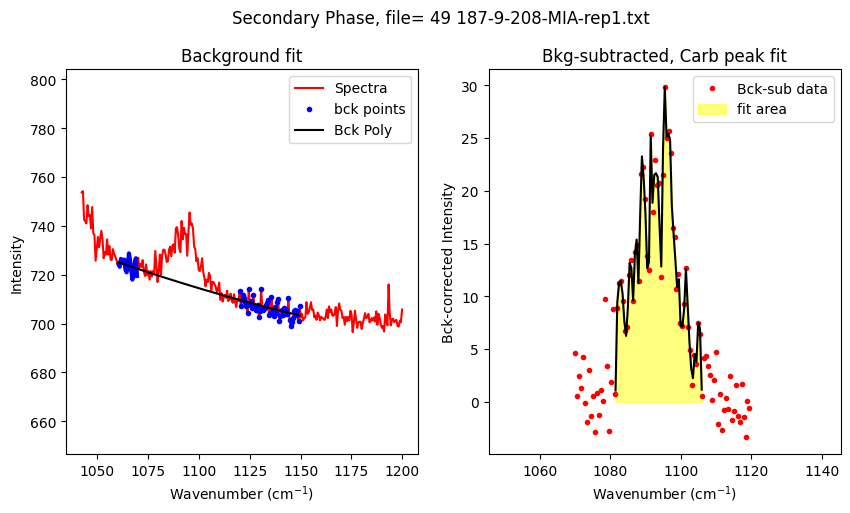

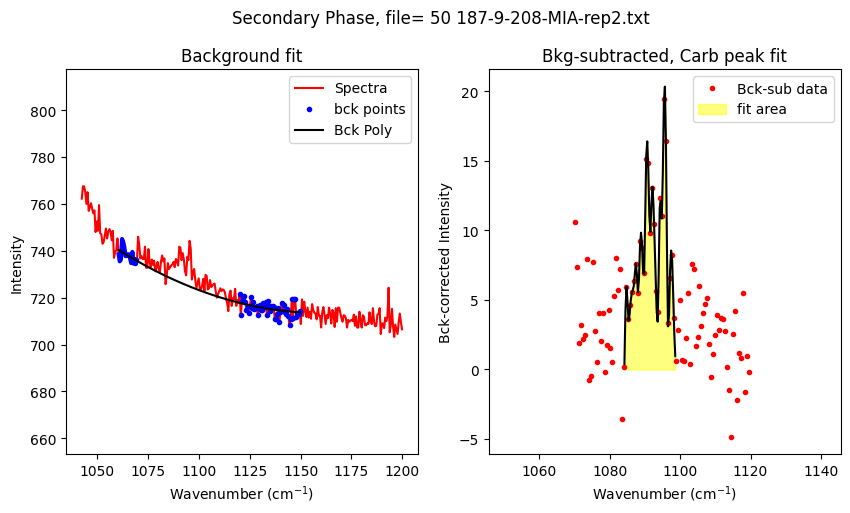

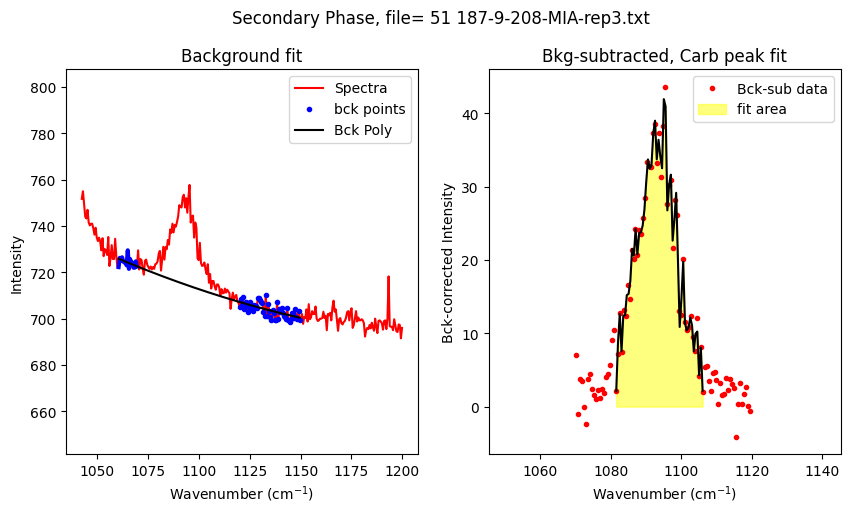

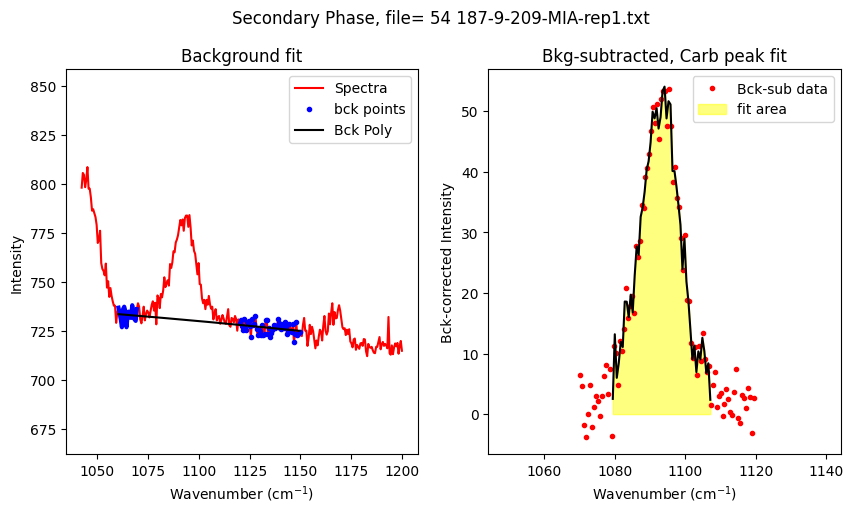

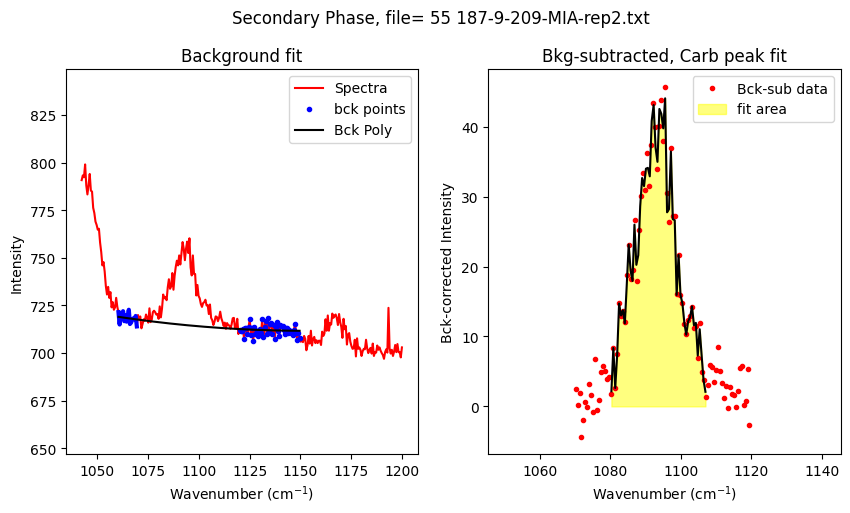

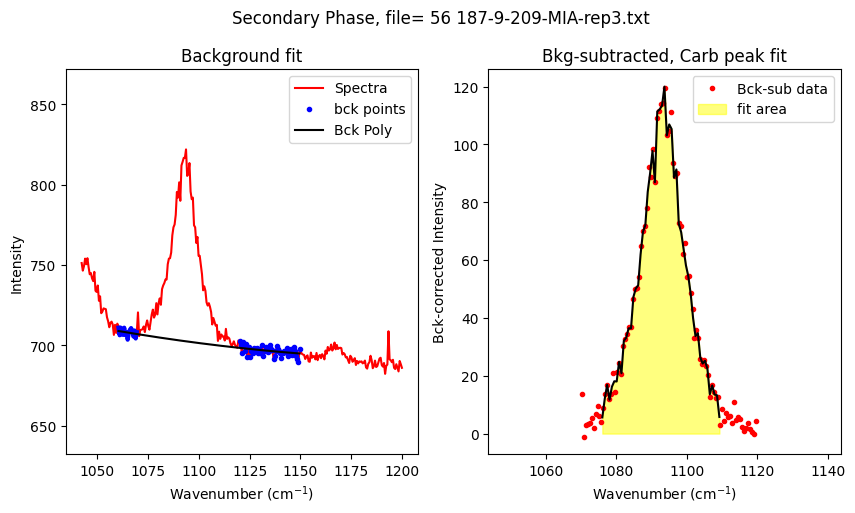

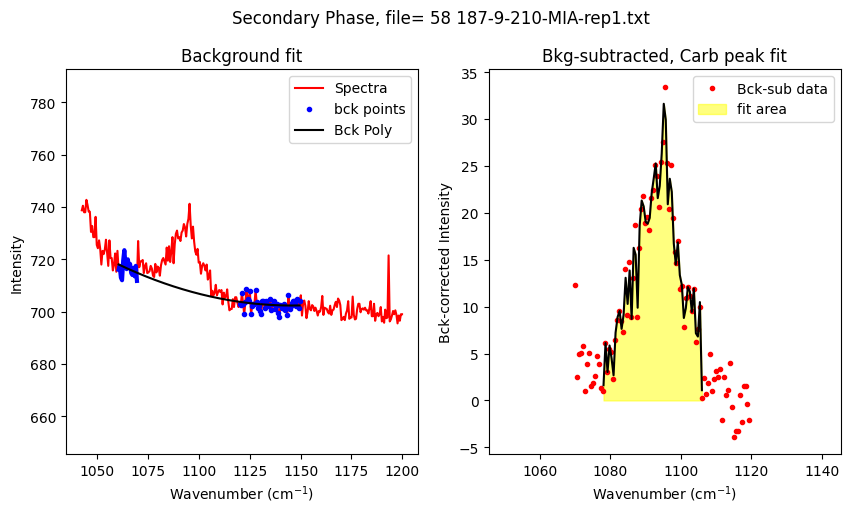

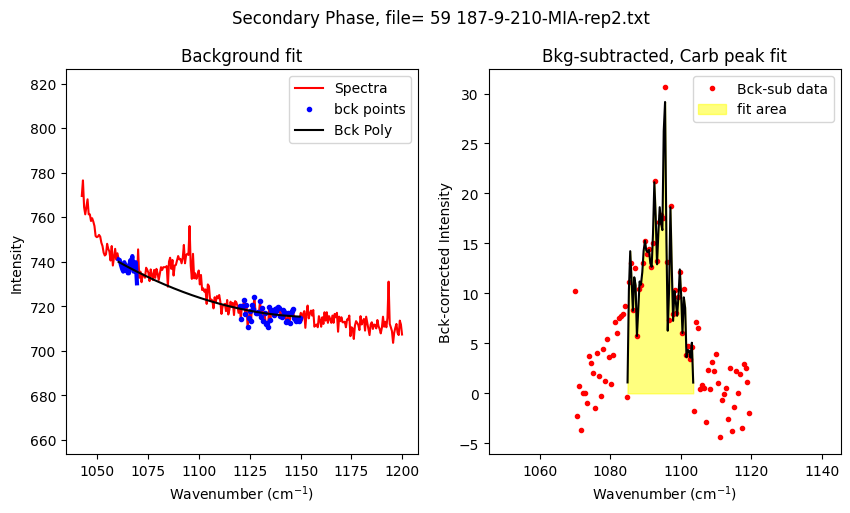

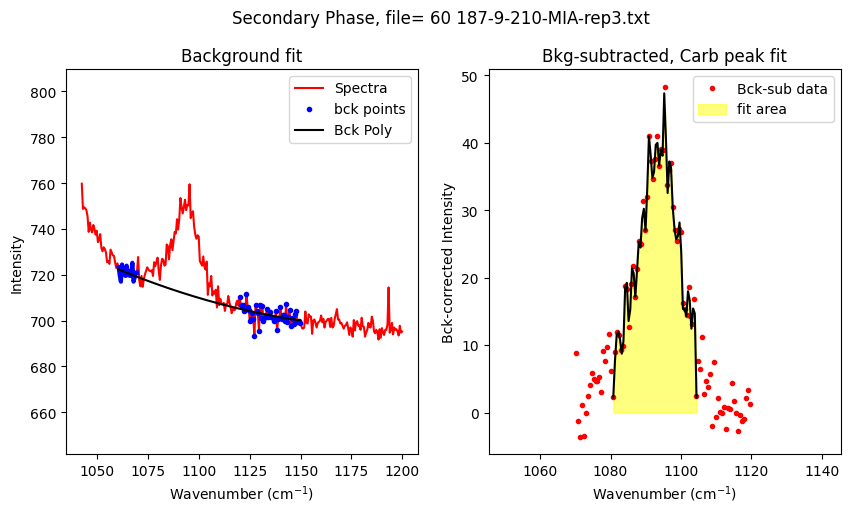

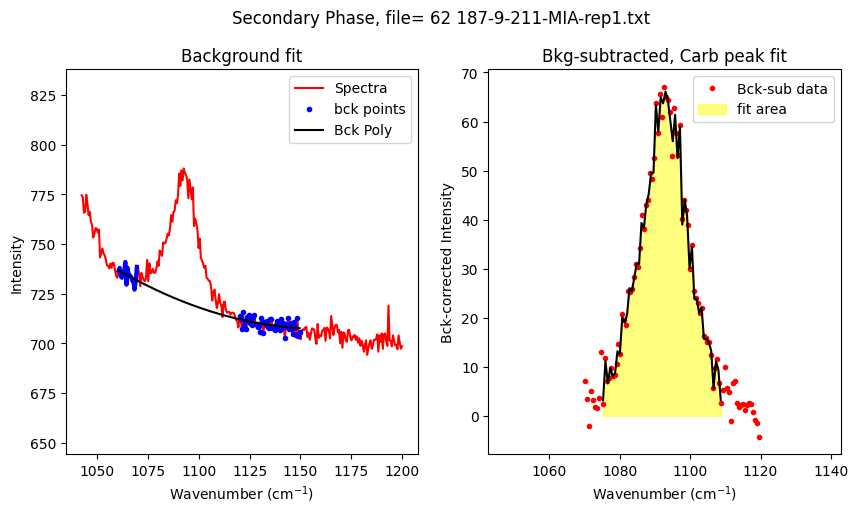

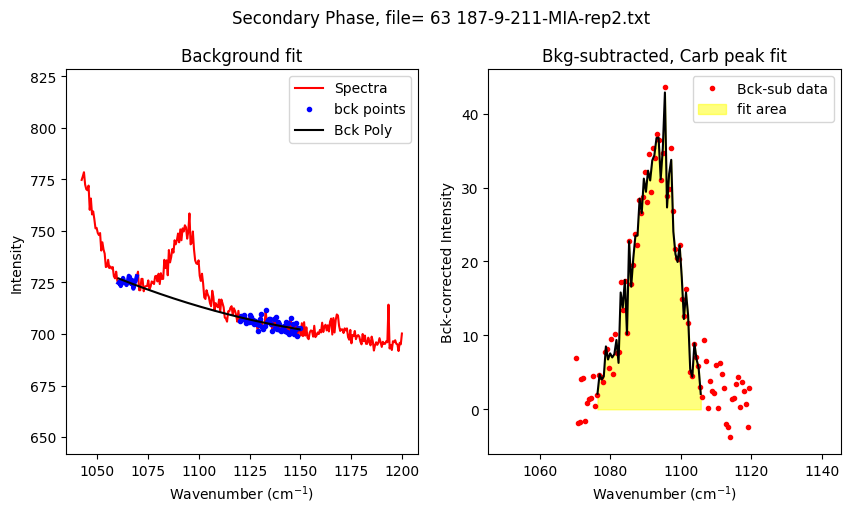

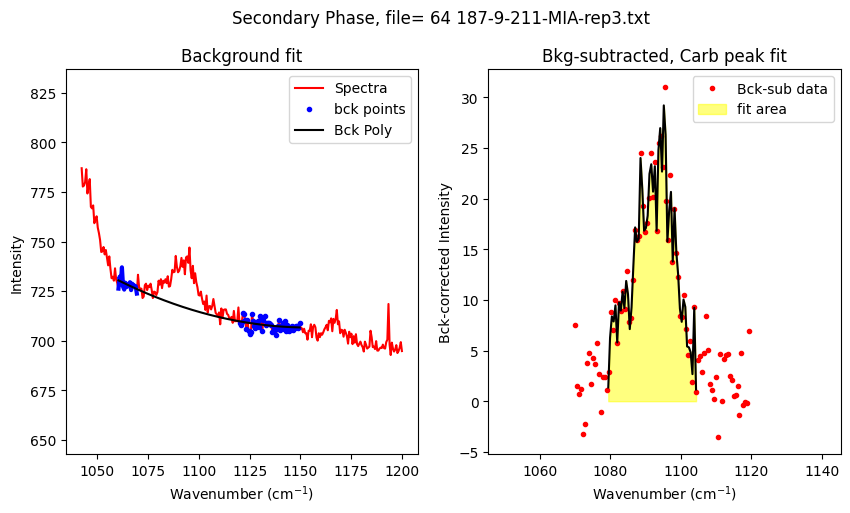

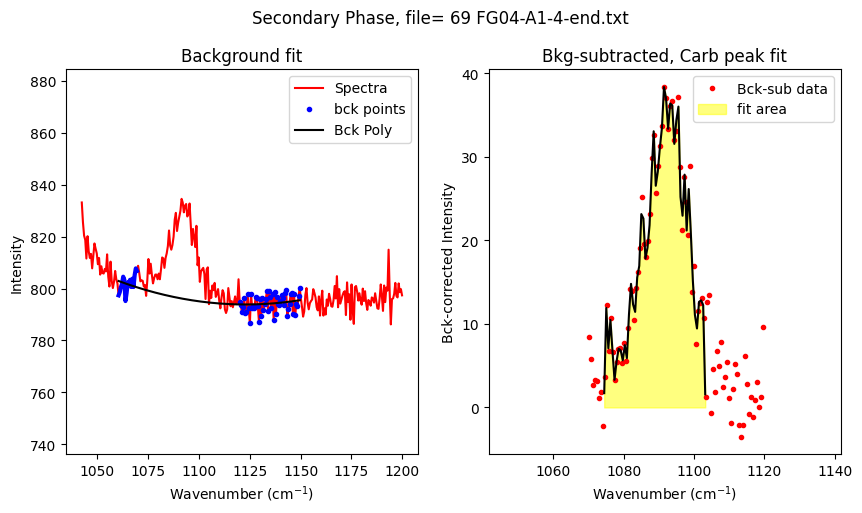

In [33]:
files_to_fit=filenames_Carb
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_Carb = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)

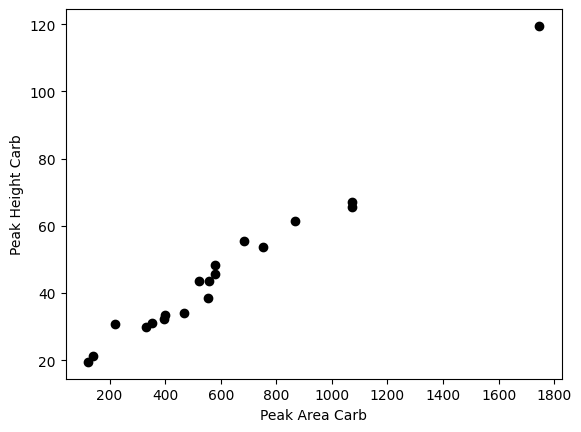

In [34]:
if sum(Carb_filter)>0:
    plt.plot(df_Merge_Carb['Peak_Area_Carb'], 
        df_Merge_Carb['Peak_Height_Carb'], 'ok')
    plt.xlabel('Peak Area Carb')
    plt.ylabel('Peak Height Carb')
# plt.yscale('log')
# plt.xscale('log')

## Save to excel

In [35]:
df_Merge_Carb=df_Merge_Carb[~(df_Merge_Carb['Peak_Area_Carb']<70)]
df_Merge_Carb

filename  Peak_Cent_Carb  Peak_Area_Carb  \
0  14 187-9-203b-MIA-49mw.txt     1093.238080     1072.783848   
0  16 187-9-203b-MIA-rep2.txt     1095.413038      140.250491   
0  17 187-9-203b-MIA-rep3.txt     1095.413038      466.672496   
0   35 187-9-205-MIA-rep2.txt     1095.363607      395.645407   
0   36 187-9-205-MIA-rep3.txt     1095.462469      684.679748   
0   37 187-9-205-MIA-20mw.txt     1095.413038      867.525978   
0   49 187-9-208-MIA-rep1.txt     1095.413038      331.970726   
0   50 187-9-208-MIA-rep2.txt     1095.610761      122.913078   
0   51 187-9-208-MIA-rep3.txt     1095.264745      521.818469   
0   54 187-9-209-MIA-rep1.txt     1094.078404      751.141699   
0   55 187-9-209-MIA-rep2.txt     1095.363607      580.784918   
0   56 187-9-209-MIA-rep3.txt     1093.633526     1745.597382   
0   58 187-9-210-MIA-rep1.txt     1095.413038      401.021855   
0   59 187-9-210-MIA-rep2.txt     1095.413038      220.427183   
0   60 187-9-210-MIA-rep3.txt     1095.363607      579.095794   
0   62 187-9-211-MIA-rep1.txt     1092.743771     1073.212675   
0   63 187-9-211-MIA-rep2.txt     1095.363607      557.383929   
0   64 187-9-211-MIA-rep3.txt     1095.413038      351.515159   
0        69 FG04-A1-4-end.txt     1091.656292      554.649459   

   Peak_Height_Carb Model_name  
0         65.611927     Spline  
0         21.326107     Spline  
0         34.114711     Spline  
0         32.379956     Spline  
0         55.400432     Spline  
0         61.465415     Spline  
0         29.872588     Spline  
0         19.475439     Spline  
0         43.658974     Spline  
0         53.673185     Spline  
0         45.739569     Spline  
0        119.515929     Spline  
0         33.456886     Spline  
0         30.689019     Spline  
0         48.348134     Spline  
0         67.112704     Spline  
0         43.657488     Spline  
0         31.050322     Spline  
0         38.418500     Spline

In [36]:
if sum(Carb_filter)>0:
    df_Merge_Carb.loc[:,'filename'] = df_Merge_Carb['filename'].str.replace('--Spec.Data 1', '')
    df_Merge_Carb.to_excel('Carb_Peak_fits.xlsx', index=False )

In [37]:
df_Merge_Carb

filename  Peak_Cent_Carb  Peak_Area_Carb  \
0  14 187-9-203b-MIA-49mw.txt     1093.238080     1072.783848   
0  16 187-9-203b-MIA-rep2.txt     1095.413038      140.250491   
0  17 187-9-203b-MIA-rep3.txt     1095.413038      466.672496   
0   35 187-9-205-MIA-rep2.txt     1095.363607      395.645407   
0   36 187-9-205-MIA-rep3.txt     1095.462469      684.679748   
0   37 187-9-205-MIA-20mw.txt     1095.413038      867.525978   
0   49 187-9-208-MIA-rep1.txt     1095.413038      331.970726   
0   50 187-9-208-MIA-rep2.txt     1095.610761      122.913078   
0   51 187-9-208-MIA-rep3.txt     1095.264745      521.818469   
0   54 187-9-209-MIA-rep1.txt     1094.078404      751.141699   
0   55 187-9-209-MIA-rep2.txt     1095.363607      580.784918   
0   56 187-9-209-MIA-rep3.txt     1093.633526     1745.597382   
0   58 187-9-210-MIA-rep1.txt     1095.413038      401.021855   
0   59 187-9-210-MIA-rep2.txt     1095.413038      220.427183   
0   60 187-9-210-MIA-rep3.txt     1095.363607      579.095794   
0   62 187-9-211-MIA-rep1.txt     1092.743771     1073.212675   
0   63 187-9-211-MIA-rep2.txt     1095.363607      557.383929   
0   64 187-9-211-MIA-rep3.txt     1095.413038      351.515159   
0        69 FG04-A1-4-end.txt     1091.656292      554.649459   

   Peak_Height_Carb Model_name  
0         65.611927     Spline  
0         21.326107     Spline  
0         34.114711     Spline  
0         32.379956     Spline  
0         55.400432     Spline  
0         61.465415     Spline  
0         29.872588     Spline  
0         19.475439     Spline  
0         43.658974     Spline  
0         53.673185     Spline  
0         45.739569     Spline  
0        119.515929     Spline  
0         33.456886     Spline  
0         30.689019     Spline  
0         48.348134     Spline  
0         67.112704     Spline  
0         43.657488     Spline  
0         31.050322     Spline  
0         38.418500     Spline